In [1]:
# %pip install numpy
# %pip install pandas
# %pip install scikit-learn
# %pip install tensorflow
# %pip install matplotlib
# %pip install statsmodels
# %pip install keras

In [2]:
import math
import numpy as np
import pandas as pd
import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import tensorflow as tf

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('SIDO.csv')

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,270.435486,270.435486,270.435486,270.435486,202.735489,0
2018-01-02,272.916565,280.359741,265.473389,267.954437,200.875534,9840956
2018-01-03,267.954437,275.397613,265.473389,272.916565,204.595444,17716624
2018-01-04,275.397613,275.397613,270.435486,272.916565,204.595444,2728068
2018-01-05,272.916565,290.283966,270.435486,282.840790,212.035324,35399190
...,...,...,...,...,...,...
2023-05-09,805.000000,805.000000,795.000000,800.000000,800.000000,18328100
2023-05-10,800.000000,805.000000,770.000000,775.000000,775.000000,37593900
2023-05-11,775.000000,775.000000,755.000000,775.000000,775.000000,19482700


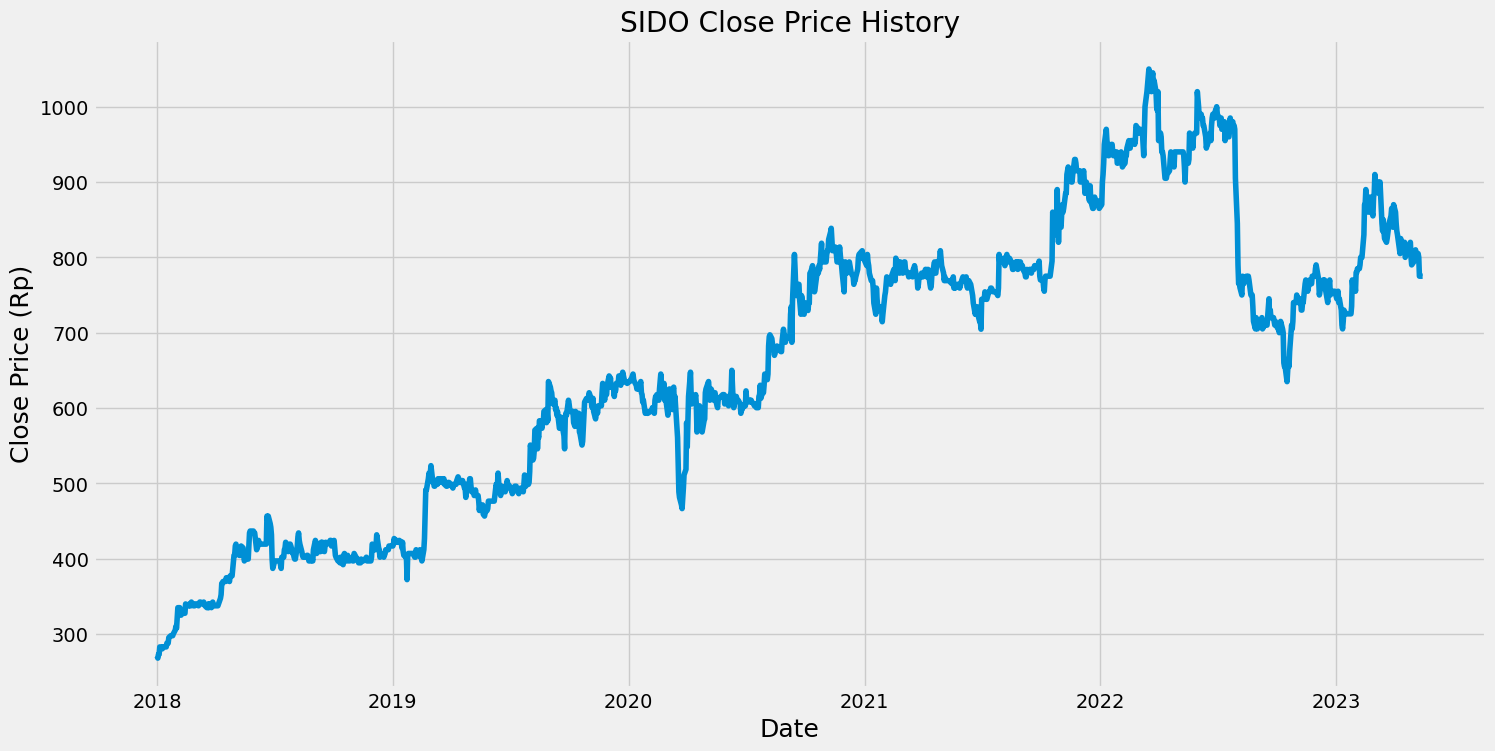

In [5]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('SIDO Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (Rp)',fontsize=18)
plt.show()

In [6]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
data.head()

,Close
Date,
2018-01-01,270.435486
2018-01-02,267.954437
2018-01-03,272.916565
2018-01-04,272.916565
2018-01-05,282.840790


In [7]:
#Convert the dataframe to a numpy array
dataset = data.values

In [8]:
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)

In [9]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))#feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [10]:
# Create the training data set
train_data = scaled_data[0:training_data_len,:]
## Split the data into train and test
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()
print(len(x_train))
print(len(y_train))

[array([0.00317251, 0.        , 0.00634506, 0.00634506, 0.01903515,
       0.01903515, 0.01586264, 0.01903515, 0.01903515, 0.01903515,
       0.01903515, 0.02538021, 0.02538021, 0.02538021, 0.03489778,
       0.03807029, 0.03807029, 0.03807029, 0.03807029, 0.04124285,
       0.04758787, 0.05393293, 0.05076042, 0.06979557, 0.0856582 ,
       0.0856582 , 0.07296808, 0.07296808, 0.07931314, 0.07614063,
       0.07614063, 0.07614063, 0.09200323, 0.08883071, 0.08883071,
       0.08883071, 0.09200323, 0.08883071, 0.08883071, 0.09517578,
       0.08883071, 0.08883071, 0.08883071, 0.09200323, 0.09200323,
       0.09200323, 0.08883071, 0.09200323, 0.09517578, 0.09517578,
       0.09200323, 0.09200323, 0.09517578, 0.09200323, 0.08883071,
       0.0856582 , 0.0856582 , 0.09200323, 0.0856582 , 0.09200323])]
[0.08565820214965852]

[array([0.00317251, 0.        , 0.00634506, 0.00634506, 0.01903515,
       0.01903515, 0.01586264, 0.01903515, 0.01903515, 0.01903515,
       0.01903515, 0.02538021, 0.02

In [11]:
#Conver the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [13]:
# Membangun model ANN dengan TensorFlow
model_ann = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Mengompilasi model_ann
model_ann.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='mse')


# Melatih model_ann
model_ann.fit(x_train, y_train, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
64/64 [==============================] - 1s 2ms/step - loss: 0.0304
Epoch 2/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 3/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 4/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 5/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 6/100
64/64 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 7/100
64/64 [==============================] - 0s 2ms/step - loss: 9.2330e-04
Epoch 8/100
64/64 [==============================] - 0s 2ms/step - loss: 8.4482e-04
Epoch 9/100
64/64 [==============================] - 0s 2ms/step - loss: 7.6310e-04
Epoch 10/100
64/64 [==============================] - 0s 2ms/step - loss: 9.1608e-04
Epoch 11/100
64/64 [==============================] - 0s 2ms/step - loss: 6.5141e-04
Epoch 12/100
64/64 [==============================] - 0s 2ms/step - loss: 7.5120e-04
Epoch 13/100


In [14]:
## Create the testing data set
# Create a new array containing scaled vlues from index 1543 to 2003
test_data = scaled_data[training_data_len-60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [15]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [16]:
# Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [17]:
# Get the model_ann predicted price values
predictions = model_ann.predict(x_test)
predictions = scaler.inverse_transform(predictions)

9/9 [==============================] - 0s 2ms/step


C:\Users\dhori\AppData\Local\Temp\ipykernel_10064\983738799.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


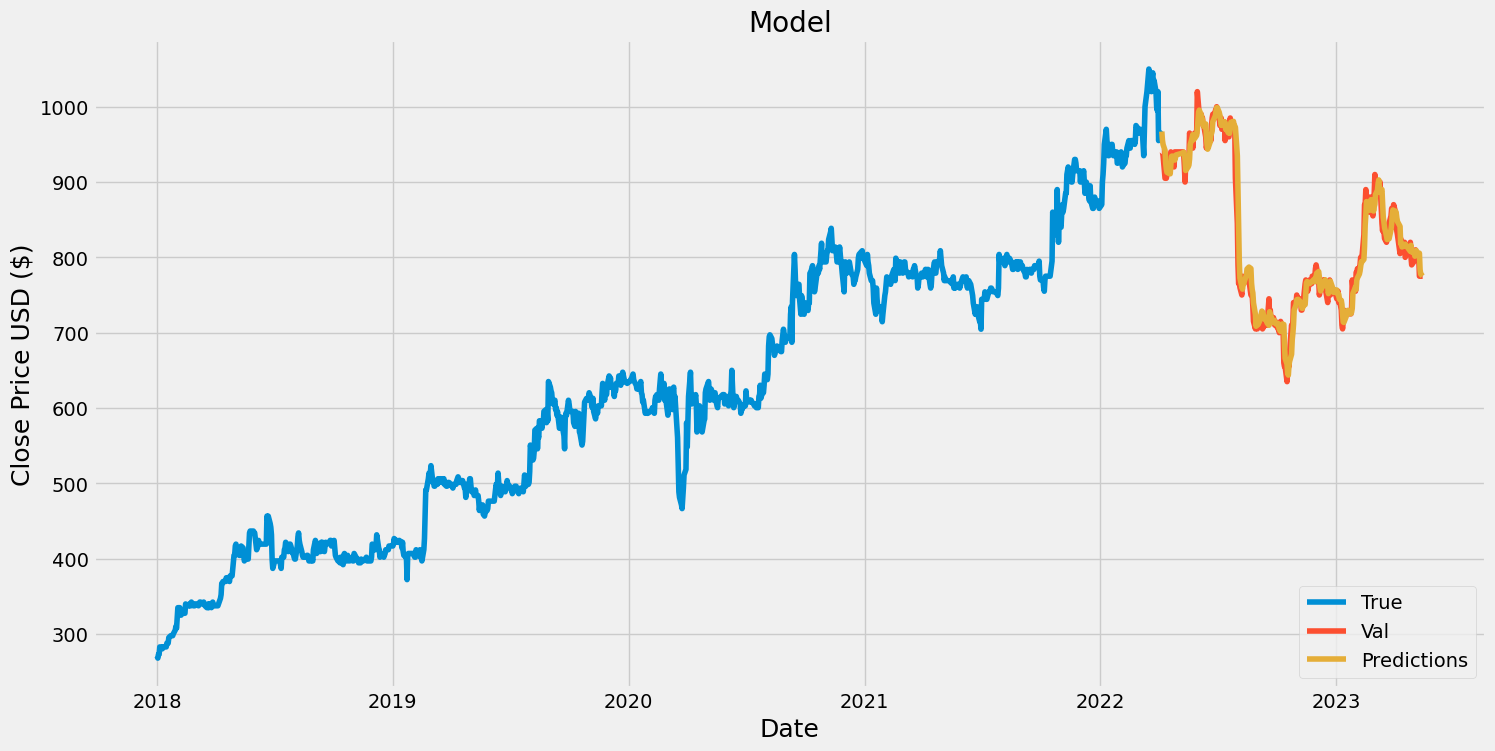

In [18]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

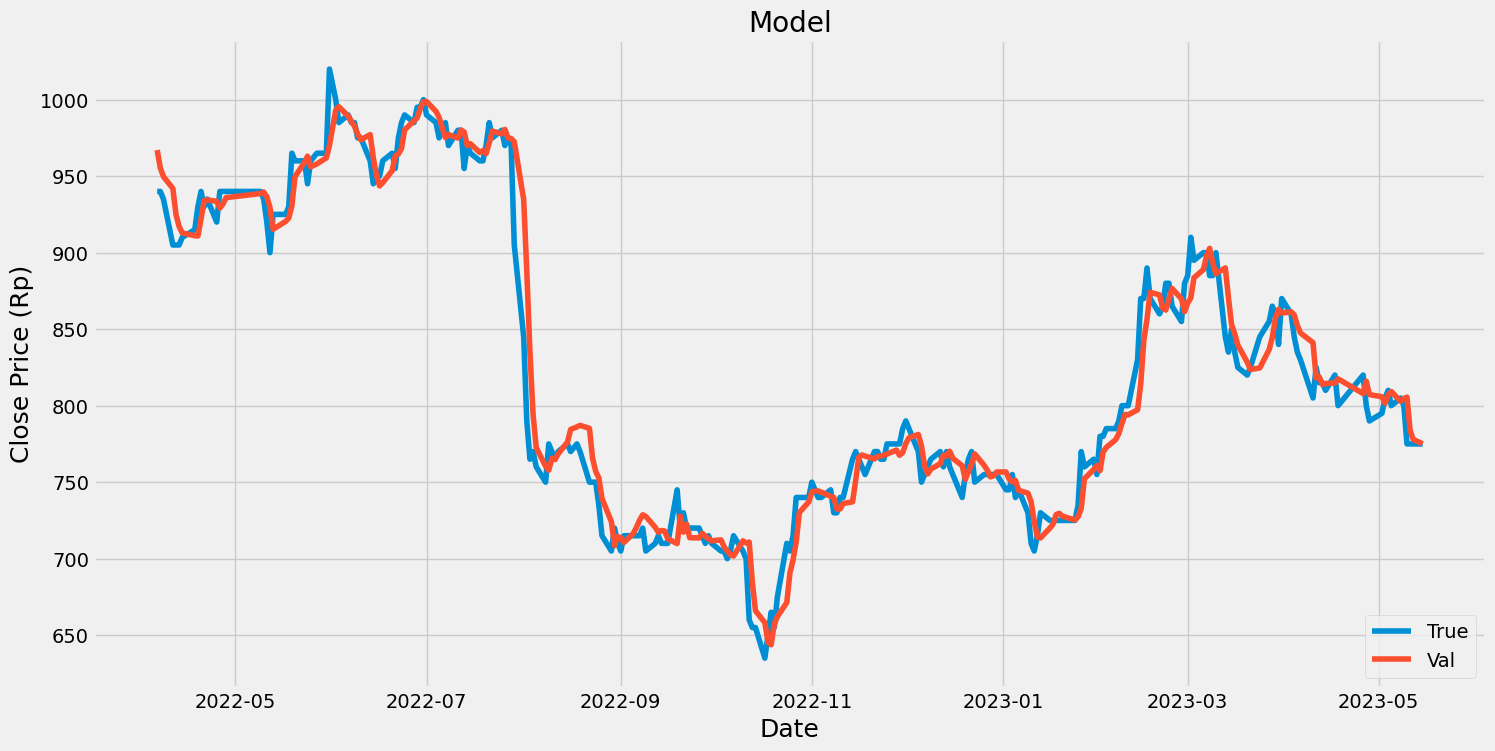

In [19]:
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price (Rp)', fontsize=18)
plt.plot(valid[['Close','Predictions']])
plt.legend(['True', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [20]:
# Get the MSE & RMSE
mse = np.mean(predictions-y_test)**2
rmse = np.sqrt(np.mean(predictions-y_test)**2)
mape = np.mean((np.abs(predictions - y_test) / y_test) * 100)

print('MAPE : %.5f' % mape)
print('MSE : %.5f' % mse)
print('RMSE : %.5f' % rmse)

MAPE : 1.47558
MSE : 3.84927
RMSE : 1.96196
